In [403]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [404]:
data = pd.read_csv("main_cookie.csv")
data = data.sample(frac = 1)
labels = data["count"]
data.drop(['count'], axis = 1, inplace = True)
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [405]:
data_array = np.array(data)

for i in range(data_array.shape[0]):
    
    threshold = sum(data_array[i])/784
    threshold = (threshold*50)/100
    for j in range(len(data_array[i])):
        
        if data_array[i][j] < threshold:
            data_array[i][j] = 0
        else:
            data_array[i][j] = 255

data = pd.DataFrame(data_array)

In [406]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=27)


#imputing the missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())


#scaling the data
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scalar.transform(X_test))
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

shape of pca_reduced.shape =  (416, 2)


/home/ravi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


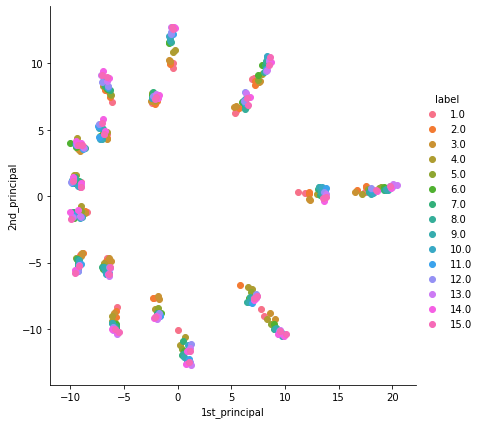

In [407]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y_train)).T

import seaborn as sns
import matplotlib.pyplot as plt

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


In [408]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg.score(X_train_scaled, y_train)
lin_reg.score(X_test_scaled, y_test)

0.8971373478904816

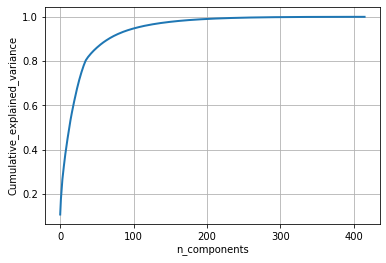

In [409]:
# PCA for dimensionality redcution (non-visualization)
import matplotlib.pyplot as plt

pca.n_components = X_train.shape[0]
pca_data = pca.fit_transform(X_train_scaled)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

pca.n_components = 150
pca_data = pca.fit_transform(X_train_scaled)
pca_test_data = pca.transform(X_test_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(pca_data, y_train)

test_preds = lin_reg.predict(pca_test_data)


from sklearn.metrics import mean_squared_error
print("mean squared error : ", mean_squared_error(test_preds, y_test))

from sklearn.metrics import r2_score
print("R squared score : ", r2_score(test_preds, y_test))


shape of pca_reduced.shape =  (416, 150)
mean squared error :  0.4880084745510551
R squared score :  0.9654165924461927


In [411]:
from sklearn.linear_model import Ridge
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

pca.n_components = 150
pca_data = pca.fit_transform(X_train_scaled)
pca_test_data = pca.transform(X_test_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


ridge_reg = Ridge(alpha = 100)
ridge_reg.fit(pca_data, y_train)

test_preds = ridge_reg.predict(pca_test_data)


from sklearn.metrics import mean_squared_error
print("mean squared error : ", mean_squared_error(test_preds, y_test))

from sklearn.metrics import r2_score
print("R squared score : ", r2_score(test_preds, y_test))


shape of pca_reduced.shape =  (416, 150)
mean squared error :  0.5476368095032346
R squared score :  0.9582557363526523


In [412]:
from sklearn import linear_model
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

pca.n_components = 150
pca_data = pca.fit_transform(X_train_scaled)
pca_test_data = pca.transform(X_test_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


lasso_reg = linear_model.Lasso(alpha=0.5)
lasso_reg.fit(pca_data, y_train)

test_preds = lasso_reg.predict(pca_test_data)


from sklearn.metrics import mean_squared_error
print("mean squared error : ", mean_squared_error(test_preds, y_test))

from sklearn.metrics import r2_score
print("R squared score : ", r2_score(test_preds, y_test))


shape of pca_reduced.shape =  (416, 150)
mean squared error :  1.4848203943550788
R squared score :  0.8463001998019061


In [413]:
from sklearn.svm import SVR

pca.n_components = 150
pca_data = pca.fit_transform(X_train_scaled)
pca_test_data = pca.transform(X_test_scaled)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

regr = SVR(C=10, epsilon=0.1)
regr.fit(pca_data, y_train)

test_preds = regr.predict(pca_test_data)


from sklearn.metrics import mean_squared_error
print("mean squared error : ", mean_squared_error(test_preds, y_test))

from sklearn.metrics import r2_score
print("R squared score : ", r2_score(test_preds, y_test))

shape of pca_reduced.shape =  (416, 150)
mean squared error :  0.697190607083157
R squared score :  0.9582348782765621


array([7.92288378])

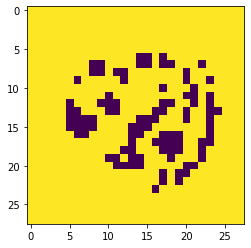

In [415]:
import cv2 as cv

test_img = cv.imread('cookie5.jpeg', 0)

test_img = cv.resize(test_img, (28,28))


summ = 0

for i in range(test_img.shape[0]):
    for j in range(test_img.shape[1]):
        summ += test_img[i][j]
        
threshold = summ/784
threshold = (threshold * 50)/100

for i in range(test_img.shape[0]):
    for j in range(test_img.shape[1]):
        if test_img[i][j] < threshold:
            test_img[i][j] = 0
        else:
            test_img[i][j] = 255


plt.imshow(test_img)


test_img = test_img.reshape(1,784)

test_img = scalar.transform(test_img)

test_img = pca.transform(test_img)

regr.predict(test_img)